Linear Regression In Machine Learning

In [16]:
# Author : rudxkush
import matplotlib.pyplot as plt
# Linear Regression is where we are trying to find the best line/plane that fits the given data points
# for 2D geometry, we'll try to find
# y = b_1 * x + b_0
# where b_1 is the slope of the line and b_0 is the y-intercept
# x is the feature, and y is what we want to predict once we have the best fitting line
# for 3D geometry, we'll try to find
# y = b_2 * feature_1 + b_1 * feature_2 + b_0
# y represents a plane here!
# where
# b_2 is the slope of the plane along feature_1
# b_1 is the slope of the plane along feature_2
# b_0 is the intercept, i.e., where the plane cuts the y-axis
# the goal in both cases is to find values of b's such that
# the distance (error) between actual y and predicted y is minimum

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data = fetch_california_housing()

x = data.data[:, [0]]   # Median Income (x), 2D Array where matrix[i][0] -> income_i
y = data.target         # House Price (y), 1D Array

x_train, x_test, y_train, y_test = train_test_split (
    x, y, test_size = 0.2
)
# 20% of the given data points are excluded for later evaluating the model accuracy that is how well our model performs on unseen data points

# Goal : Find the best hyper-plane that fits the data
# hyper-plane = b^T * x + b_0
# where:
#   b^T is a 1-D array (weights / slope vector)
#   x   is the input feature vector
#   b_0 is the intercept (bias)

# We want the optimal parameters (b, b_0) such that:
#   optimal(b, b_0) = argmin over all (b, b_0) of the total squared error across all points:
#                     sum from i = 1 to n of (y_i - y_i_predicted)^2
#   where:
#   y_i_predicted = b^T * x_i + b_0
#   sum from i = 1 to n of (y_i - (b^T * x_i + b_0))^2

# Regularisation :
# sum from i = 1 to n of (y_i - (b^T * x_i + b_0))^2
# + lambda * ||b||^2

# Probabilistic Interpretation :
# if P(y_i | x_i) = N(mean, variance):
#       derive loss function using linear regression!

# Loss-min:
# Visualizing the squared loss for one point:
#   - x-axis: error = (y_i - y_i_predicted)
#   - y-axis: loss = (y_i - y_i_predicted)^2
#
# This forms a parabola-like curve:
#   - The “bottom” of the curve touches 0 on the y-axis when error = 0
#   - As the error increases in either direction, the loss rises quadratically (y = x^2)
#   - The loss is minimal when the prediction matches the true value
#   - Squared loss punishes large errors more heavily
#   - Geometrically, the curve is symmetric and bowl-shaped

# If we have an imbalanced data : upsampling, downsampling
# Feature Importance and Interpretability : If the feature are not multi-collinear, then you can use the feature weights |w_j|.
# No multi-class classification
# Feature transform : same as Logistic Regression
# Regularization : same as Logistic Regression L1 Reg : you would get sparsity and feature importance(if you increase lambda)

# Outliers:
# Since we use squared loss, points far away from the hyper-plane
# contribute disproportionately large error and can strongly influence the model

# Procedure (one possible approach):
# 1. Train the model and compute the distance (residual) of each point from the hyper-plane
# 2. Identify points whose error is abnormally large (potential outliers)
# 3. Remove those points from x_train and y_train
#    x_train' = x_train - outliers
# 4. Retrain the model on the cleaned data
# 5. Optionally repeat the process
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [17]:
print(x_train)
print(y_train)

[[4.    ]
 [1.6953]
 [1.4492]
 ...
 [5.1337]
 [6.1636]
 [3.4453]]
[2.486 1.5   2.229 ... 1.548 3.677 1.767]


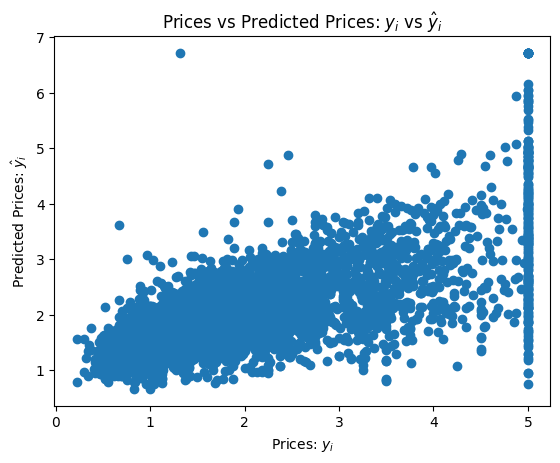

In [19]:
lm = LinearRegression()
lm.fit(x_train, y_train)

y_pred = lm.predict(x_test)

plt.scatter(y_test, y_pred)
plt.xlabel(r"Prices: $y_i$")
plt.ylabel(r"Predicted Prices: $\hat{y}_i$")
plt.title(r"Prices vs Predicted Prices: $y_i$ vs $\hat{y}_i$")
plt.show()